In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('adult_salary.csv')

In [3]:
data.head(10)

,AGE,WORK_CLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MATRITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,SALARY_CLASS
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#dropping not required columns
data.drop(['EDUCATION_NUM'], inplace = True, axis=1)

In [5]:
data.loc[data['SALARY_CLASS'] == ' <=50K', 'SALARY_CLASS'] = 0
data.loc[data['SALARY_CLASS'] == ' >50K', 'SALARY_CLASS'] = 1

In [6]:
columns_contain_missing_value = []
for column in data.columns.values.tolist():
    if ' ?' in data[column].value_counts().keys().tolist():
        columns_contain_missing_value.append(column)

#Replacing missing value with the mode
for missing_col in columns_contain_missing_value:
    data.loc[data[missing_col] == ' ?', missing_col] = data[missing_col].mode()[0] 

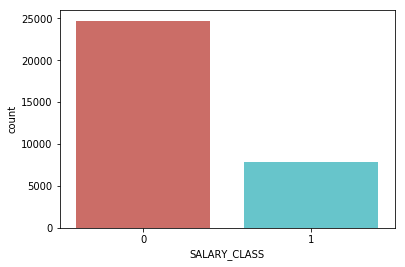

In [7]:
sns.countplot(x = 'SALARY_CLASS', data= data, palette = 'hls')
plt.show()

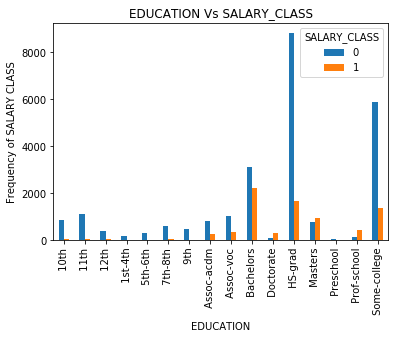

In [8]:
pd.crosstab(data.EDUCATION,data.SALARY_CLASS).plot(kind='bar')
plt.title('EDUCATION Vs SALARY_CLASS')
plt.xlabel('EDUCATION')
plt.ylabel('Frequency of SALARY CLASS')
plt.show()

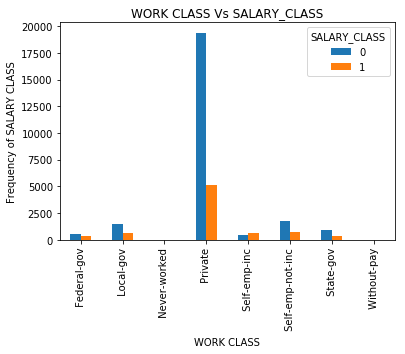

In [9]:
pd.crosstab(data.WORK_CLASS,data.SALARY_CLASS).plot(kind='bar')
plt.title('WORK CLASS Vs SALARY_CLASS')
plt.xlabel('WORK CLASS')
plt.ylabel('Frequency of SALARY CLASS')
plt.show()

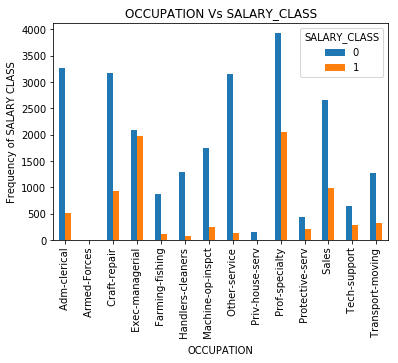

In [10]:
pd.crosstab(data.OCCUPATION,data.SALARY_CLASS).plot(kind='bar')
plt.title('OCCUPATION Vs SALARY_CLASS')
plt.xlabel('OCCUPATION')
plt.ylabel('Frequency of SALARY CLASS')
plt.show()

In [11]:
#Grouping by salary class
data.groupby('SALARY_CLASS').mean()

,AGE,FNLWGT,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK
SALARY_CLASS,,,,,
0,36.783738,190340.86517,148.752468,53.142921,38.840210
1,44.249841,188005.00000,4006.142456,195.001530,45.473026


In [12]:
cat_col = ['WORK_CLASS', 'EDUCATION', 'MATRITAL_STATUS','OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'NATIVE_COUNTRY']
le = preprocessing.LabelEncoder()
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [13]:
#Segregate dependent and independent variable
data_final_vars = data.columns.values.tolist()
y = ['SALARY_CLASS']
X = [i for i in data_final_vars if i not in y]

In [23]:
#Feature selection using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 13)
rfe = rfe.fit(data[X], data[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
#Modeling with Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [21]:
#Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.795


Recall metric in the testing dataset:  0.29678238780694327
Confusion Metric in the testing dataset: 
 [[7067  340]
 [1661  701]]


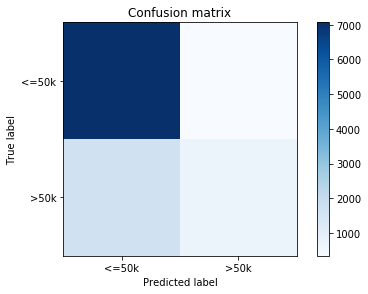

In [22]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print("Confusion Metric in the testing dataset: \n", cnf_matrix)

# Plot non-normalized confusion matrix
class_names = ["<=50k", ">50k"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()